In [52]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import requests
from zipfile import ZipFile
import io

In [108]:
# Load features
features_path = 'C:/Users/KIIT0001/Downloads/UCI HAR Dataset/features.txt'
features = pd.read_csv(features_path, sep='\s+', header=None)[1].values

# Ensure unique feature names
unique_features = []
for i, feature in enumerate(features):
    if feature in unique_features:
        unique_features.append(f"{feature}_{i}")
    else:
        unique_features.append(feature)

In [109]:
# Load training data
X_train_path = 'C:/Users/KIIT0001/Downloads/UCI HAR Dataset/train/X_train.txt'
X_train = pd.read_csv(X_train_path, sep='\s+', names=unique_features, index_col=False)
print(f"X_train shape: {X_train.shape}")
print(X_train.head())

X_train shape: (7352, 561)
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc

In [110]:
y_train_path = 'C:/Users/KIIT0001/Downloads/UCI HAR Dataset/train/y_train.txt'
y_train = pd.read_csv(y_train_path, sep='\s+', header=None, names=['Activity No'])
print(f"y_train shape: {y_train.shape}")
print(y_train.head())

y_train shape: (7352, 1)
   Activity No
0            5
1            5
2            5
3            5
4            5


In [111]:
# Load testing data
X_test_path = 'C:/Users/KIIT0001/Downloads/UCI HAR Dataset/test/X_test.txt'
X_test = pd.read_csv(X_test_path, sep='\s+', names=unique_features, index_col=False)
print(f"X_test shape: {X_test.shape}")
print(X_test.head())

X_test shape: (2947, 561)
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   

   tBodyAcc-mad()-Z  tBodyAcc-

In [112]:
y_test_path = 'C:/Users/KIIT0001/Downloads/UCI HAR Dataset/test/y_test.txt'
y_test = pd.read_csv(y_test_path, sep='\s+', header=None, names=['Activity no.'])
print(f"y_test shape: {y_test.shape}")
print(y_test.head())

y_test shape: (2947, 1)
   Activity no.
0             5
1             5
2             5
3             5
4             5


In [113]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

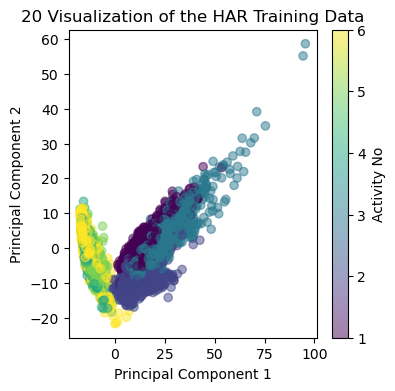

In [115]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
plt.figure(figsize=(4,4))
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train['Activity No'],alpha=0.5)
plt.title('20 Visualization of the HAR Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Activity No')
plt.show()

In [117]:
def initialize_centroids(X,k):
    indices=np.random.choice(X.shape[0],k,replace=False)
    return X[indices]
def assign_clusters(X,centroids):
    distances=np.linalg.norm(X[:,np.newaxis]-centroids,axis=2)
    return np.argmin(distances,axis=1)
def update_centroids(X,clusters,k):
    return np.array([X[clusters==i].mean(axis=0) for i in range(k)])
def kmeans(X,k,max_iters=100,tol=1e-4):
    centroids=initialize_centroids(X,k)
    for _ in range (max_iters):
        clusters=assign_clusters(X,centroids)
        new_centroids=update_centroids(X,clusters,k)
        if np.all(np.abs(new_centroids-centroids)<tol):
            break
        centroids=new_centroids
    return centroids,clusters
K=6
centroids,clusters=kmeans(X_train_pca,K)
            

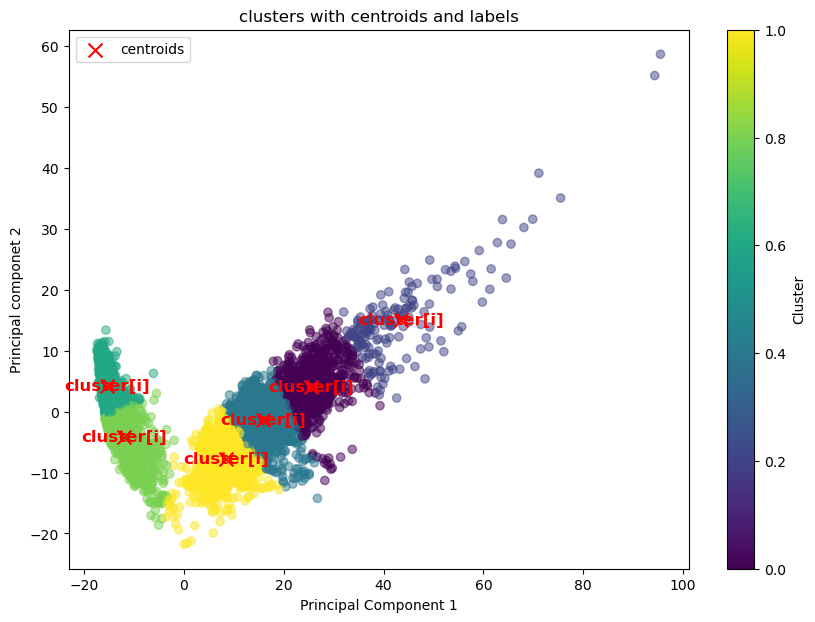

In [119]:
plt.figure(figsize=(10,7))
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=clusters,cmap='viridis',alpha=0.5)
plt.scatter(centroids[:,0],centroids[:,1],marker='x',color='red',s=100,label='centroids')
for i,centroid in enumerate(centroids):
    plt.annotate(f'cluster[i]',(centroid[0],centroid[1]),color='red',fontsize=12,weight='bold',ha='center',va='center')
plt.title('clusters with centroids and labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal componet 2')
plt.colorbar( label='Cluster')
plt.legend()
plt.show()



In [125]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [127]:
silhouette_avg=silhouette_score(X_train_pca,clusters)
print(f"silhouette score:{silhouette_avg:.3f}")


silhouette score:0.474


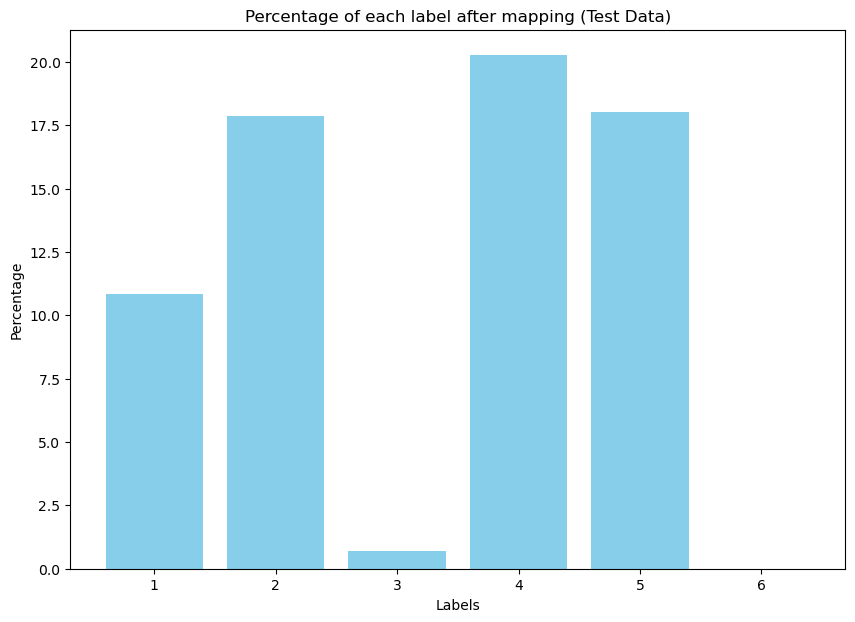

In [148]:
from sklearn.cluster import KMeans

def kmeans(data, K):
    # Perform K-means clustering
    kmeans_model = KMeans(n_clusters=K)
    kmeans_model.fit(data)
    return kmeans_model
# Assuming kmeans is a function defined as above
clusters_test_model = kmeans(X_train_pca, K)

# Fit the KMeans model to the training data
clusters_test_model.fit(X_train_pca)

# Predict cluster labels for test data
y_test_pred_clusters = clusters_test_model.predict(X_test_pca)

# Rest of the code remains the same for mapping and visualization
unique_labels_test = np.unique(y_test['Activity no.'])
label_counts_test = np.bincount(y_test_pred_clusters, minlength=unique_labels_test.max() + 1)
total_counts_test = len(y_test_pred_clusters)
label_percentages_test = (label_counts_test / total_counts_test) * 100

plt.figure(figsize=(10, 7))
plt.bar(unique_labels_test, label_percentages_test[unique_labels_test], color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Percentage')
plt.title('Percentage of each label after mapping (Test Data)')
plt.xticks(unique_labels_test)
plt.show()

Classification Report for the test data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.37      0.24      0.29       496
           2       0.26      0.29      0.28       471
           3       0.81      0.04      0.08       420
           4       0.31      0.38      0.35       491
           5       0.00      0.00      0.00       532
           6       0.00      0.00      0.00       537

    accuracy                           0.16      2947
   macro avg       0.25      0.14      0.14      2947
weighted avg       0.27      0.16      0.16      2947



c:\Users\KIIT0001\anaconda3\envs\new_env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT0001\anaconda3\envs\new_env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT0001\anaconda3\envs\new_env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


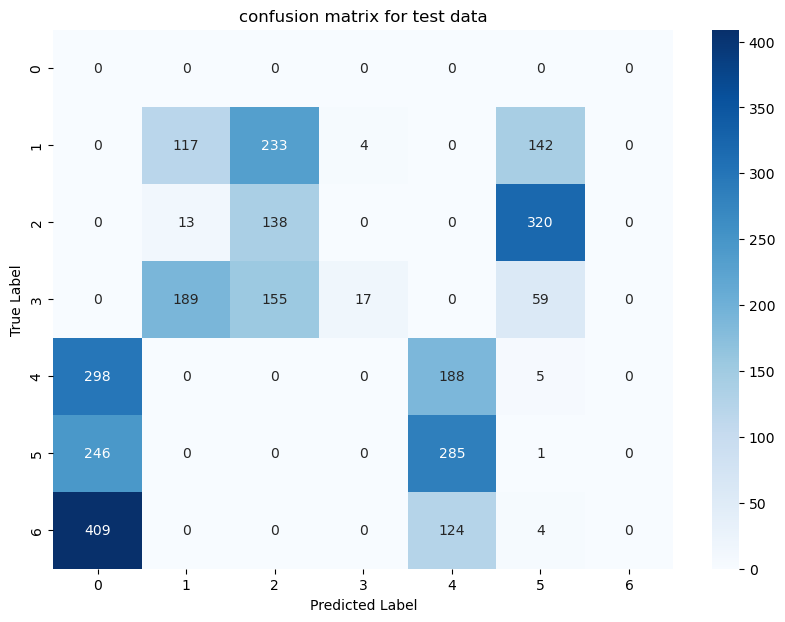

In [149]:
print('Classification Report for the test data:')
print(classification_report(y_test,y_test_pred_clusters))
conf_matrix_test=confusion_matrix(y_test,y_test_pred_clusters)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_test,annot=True,fmt='d',cmap='Blues')
plt.title('confusion matrix for test data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

